In [72]:
import scvelo as scv
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Set2 调色板
set2_colors = sns.color_palette("Set2")
# 为已知类型指定颜色
palette = {'L2_3.IT.CTX.A': set2_colors[0], 
           'L2_3.IT.CTX.B': set2_colors[1], 
           'L2_3.IT.CTX.C': set2_colors[2]}  # 为不同类型设置颜色

# 确保 RCTD 列是类别型
l23_PC1_shifted.obs['RCTD'] = l23_PC1_shifted.obs['RCTD'].astype('category')

# 获取所有在 RCTD 列中出现的类型
all_rctd_types = l23_PC1_shifted.obs['RCTD'].cat.categories

# 为未指定的类型分配默认颜色
default_color = 'gray'  # 默认颜色为灰色
for rctd_type in all_rctd_types:
    if rctd_type not in palette:
        palette[rctd_type] = default_color  # 给所有未在 palette 中的类型分配灰色

# 定义切片和类型
slices = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
types = ['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C']

# 设置绘图区域：3行4列
fig, axs = plt.subplots(3, 4, figsize=(12, 8), constrained_layout=True)  # 使用axs

# 迭代每个切片和类型来生成子图
for i, slice_type in enumerate(slices):
    for j, t in enumerate(types):
        ax = axs[j, i]  # 获取对应的子图

        # 根据切片筛选数据
        slice_data = l23_PC1_shifted[l23_PC1_shifted.obs['slice'] == slice_type]

        # 绘制散点图，确保不显示图例
        scv.pl.scatter(slice_data, 
                       basis='stereo_rotated', 
                       color='RCTD', 
                       groups=[t], 
                       palette=palette,  # 使用完整的 palette
                       ax=ax, 
                       edgecolor=None, 
                       title=f'{slice_type} - {t}', 
                       size=25,
                       legend_loc='lower center',  # 图例位置设置为图形上方居中
                       show=False)  # 避免多次调用plt.show()

# 设置布局并显示图形
plt.tight_layout()
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_celltypes.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_celltypes.pdf


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 filtered 是你的 DataFrame，只包含想画的那几类
groups = ['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C']
colors = sns.color_palette("Set2", n_colors=len(groups))
filtered = NR_l23_PC1.obs[NR_l23_PC1.obs['RCTD'].isin(groups)]

fig, ax = plt.subplots(figsize=(4,4))
for grp, col in zip(groups, colors):
    sub = filtered[filtered['RCTD'] == grp]
    sns.kdeplot(
        data=sub,
        x="digital_layer",
        color=col,       # ← 单条曲线指定颜色
        label=grp,
        common_norm=False,
        ax=ax
    )

#ax.legend(title="RCTD")


# 去掉上、右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Digital Layer')
#ax.set_ylabel('Density')
ax.set_title('NR Digital Layer Density by RCTD')

plt.tight_layout()
fig.savefig("F:/spatial/V1_integration/NR_V/figures/V1_NR_l23_kde.pdf", format='pdf', bbox_inches='tight')
plt.close(fig)


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 filtered 是你的 DataFrame，只包含想画的那几类
groups = ['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C']
colors = sns.color_palette("Set2", n_colors=len(groups))
filtered = DR_l23_PC1.obs[DR_l23_PC1.obs['RCTD'].isin(groups)]

fig, ax = plt.subplots(figsize=(4,4))
for grp, col in zip(groups, colors):
    sub = filtered[filtered['RCTD'] == grp]
    sns.kdeplot(
        data=sub,
        x="digital_layer",
        color=col,       # ← 单条曲线指定颜色
        label=grp,
        common_norm=False,
        ax=ax
    )

#ax.legend(title="RCTD")


# 去掉上、右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Digital Layer')
#ax.set_ylabel('Density')
ax.set_title('DR Digital Layer Density by RCTD')

plt.tight_layout()
fig.savefig("F:/spatial/V1_integration/NR_V/figures/V1_DR_l23_kde.pdf", format='pdf', bbox_inches='tight')
plt.close(fig)


In [58]:
import matplotlib.pyplot as plt
import scvelo as scv
import numpy as np

# 假设 gene_sets 已经定义，并且有 6 个基因集
# NR_A, NR_B, NR_C, DR_A, DR_B, DR_C
# 获取数据：l23_shifted

# 设置切片
slices = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
slice_gene_sets = {
    'NR1_2': ['NR_A', 'NR_B', 'NR_C'],
    'NR2_2': ['NR_A', 'NR_B', 'NR_C'],
    'DR1_2': ['DR_A', 'DR_B', 'DR_C'],
    'DR2_2': ['DR_A', 'DR_B', 'DR_C']
}

# 创建一个4列3行的子图布局
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))
axes = axes.flatten()  # 将二维数组展平，方便索引

# 计数器，用来确定在哪个子图位置绘制
subplot_idx = 0

# 创建一个列表用于保存所有表达量，用于colorbar
all_expression_values = []

# 为了存储所有归一化后的表达量，我们需要一个字典
normalized_expression_dict = {}

# 收集所有需要绘制的基因表达数据
for col_idx, slice_type in enumerate(slices):
    # 获取对应的基因集
    gene_sets_for_slice = slice_gene_sets[slice_type]
    
    # 获取该切片的数据
    slice_data = l23_shifted[l23_shifted.obs['slice'] == slice_type]
    
    # 为每个基因集绘制散点图
    for row_idx, gene_set_name in enumerate(gene_sets_for_slice):
        # 获取基因集的基因列表
        gene_set = gene_sets[gene_set_name]
        
        # 获取 gene_set 和 slice_data 中的基因的交集
        common_genes = list(set(gene_set) & set(slice_data.var_names))
        
        if len(common_genes) == 0:
            print(f"Warning: No valid genes from {gene_set_name} in {slice_type}")
            continue
        
        # 筛选出交集中的基因
        slice_data_filtered = slice_data[:, common_genes]
        
        # 计算基因集在该切片中的表达值（例如，取平均值或者总和）
        total_expression = slice_data_filtered.X.mean(axis=1).A1  # 每个细胞的平均表达值
        
        # 获取表达值的1%和99%分位数
        vmin = np.percentile(total_expression, 5)
        vmax = np.percentile(total_expression, 95)
        
        # 将小于1%的值设为1%的值，大于99%的值设为99%的值
        total_expression_clipped = np.clip(total_expression, vmin, vmax)
    
        # 获取对应的坐标
        stereo_coordinates = slice_data.obsm['stereo_rotated']
        
        # 绘制散点图
        ax = axes[row_idx * 4 + col_idx]  # 计算当前图的位置
        scatter = ax.scatter(stereo_coordinates[:, 0], stereo_coordinates[:, 1], c=total_expression_clipped, cmap='coolwarm', s=10)
        
        ax.set_title(f'{slice_type} - {gene_set_name}')
        ax.axis('off')  # 隐藏坐标轴
        
        # 保存表达量数据，用于colorbar
        all_expression_values.extend(total_expression_clipped)

# 添加colorbar
cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.02])  # 重新调整colorbar的位置，使其不重叠
norm = plt.Normalize(vmin=np.percentile(all_expression_values, 5), vmax=np.percentile(all_expression_values, 95))  # 设置colorbar的范围为5%-95%
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='coolwarm', norm=norm), cax=cbar_ax, orientation='horizontal')

# 设置colorbar的刻度，只显示起始和终止标签
cbar.set_ticks([norm.vmin, norm.vmax])  # 设置colorbar的刻度
cbar.set_ticklabels([f'5%', f'95%'])  # 设置刻度标签为5%和95%

# 手动调整布局，使得图像不与colorbar重叠
plt.subplots_adjust(bottom=0.02)

# 显示结果
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_ABC.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_ABC.pdf


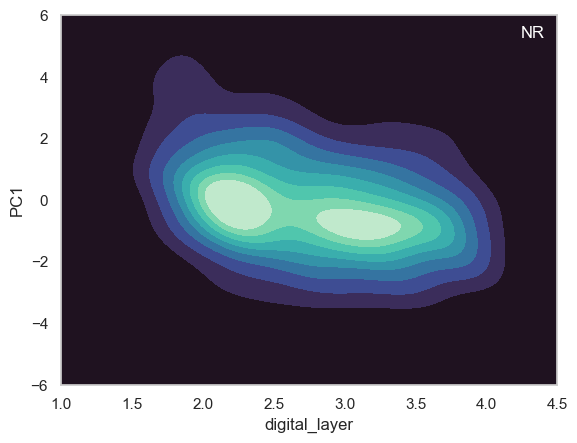

In [126]:
sns.kdeplot(
    data=filtered_NR_l23_PC1.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1, 4.5), (-6, 6)))
plt.text(0.95, 0.95, 'NR', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
plt.show()
#output_path = "F:/spatial/V1_integration/NR_V/figures/V1_NR_l23_digital_layer&PC1.pdf"
#plt.savefig(output_path, format='pdf', bbox_inches='tight')
#plt.close()

#print(f"PDF saved as {output_path}")

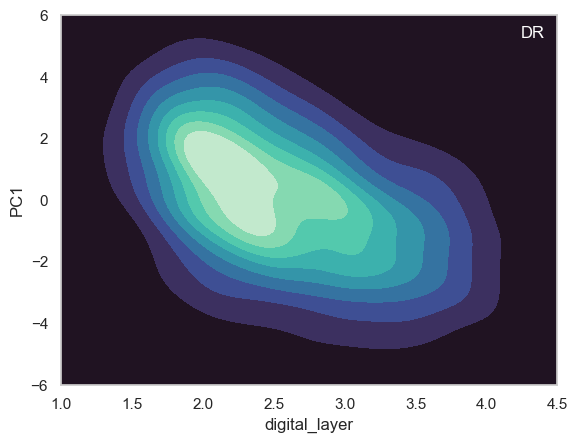

In [127]:
sns.kdeplot(
    data=filtered_DR_l23_PC1.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1, 4.5), (-6, 6)))
plt.text(0.95, 0.95, 'DR', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
plt.show()
#output_path = "F:/spatial/V1_integration/NR_V/figures/V1_DR_l23_digital_layer&PC1.pdf"
#plt.savefig(output_path, format='pdf', bbox_inches='tight')
#plt.close()

#print(f"PDF saved as {output_path}")

In [68]:
adata = filtered_l23_PC1_shifted

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# Step 1: 分别展示每个 slice 的散点图，并设置对应 colorbar 的最大值和最小值
fig, axes = plt.subplots(2, 2, figsize=(5, 4))

for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 计算当前 slice 的 PC1 的最小值和最大值
    pc1_slice_min = subset.obs['PC1'].min()
    pc1_slice_max = subset.obs['PC1'].max()
    
    # 绘制当前 slice 的散点图，colorbar 范围为该 slice 的 PC1 最小值和最大值
    scv.pl.scatter(subset, basis='stereo_rotated', color='PC1', cmap='viridis', 
                   vmin=pc1_slice_min, vmax=pc1_slice_max,  # 设置当前 slice 的 colorbar 范围
                    ax=ax, show=False, 
                   size=20, title=slice_category)
    
    # 获取 colorbar 对象
    cbar = ax.collections[0].colorbar
    # 设置 colorbar 的 ticks 为当前 slice 的最小值和最大值
    cbar.set_ticks([pc1_slice_min, pc1_slice_max])
    
    # 设置 colorbar 的标签
    cbar.set_label('PC1', fontsize=8)  # 设置 colorbar 标签字体大小

    # 调整刻度标签的字体大小
    cbar.ax.tick_params(labelsize=8)  # 设置刻度标签的字体大小
    # 设置 title 的字体大小
    ax.set_title(slice_category, fontsize=10)  # 设置 title 字体大小

# 调整子图布局
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.2)
# 显示图形
#plt.show()
# 保存为 PDF
output_path = "V1_l23_PC1.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")






Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
PDF saved as V1_l23_PC1.pdf


In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 假设V1.obs中有 "PC1" 和 "condition" 列
data = V1.obs['PC1']
condition_list = V1.obs['condition'].unique()

# 创建一个空字典来保存每个condition的FWHM
fwhm_dict = {}

# 使用sns.displot来绘制KDE图，返回一个FacetGrid对象
g = sns.displot(V1.obs, x="PC1", hue="condition", kind="kde")

# 获取FacetGrid中的Axes对象，使用g.axes[0, 0]来访问第一个子图的Axes对象
axes = g.axes[0, 0]

# 设置偏移量初始值
offset = 0  # 偏移量（百分比）

# 计算每个condition的FWHM并添加到图中
for condition in condition_list:
    condition_data = V1.obs[V1.obs['condition'] == condition]['PC1']
    
    # 使用scipy的gaussian_kde计算KDE
    kde = gaussian_kde(condition_data, bw_method='silverman')  # 可以选择合适的带宽方法
    x = np.linspace(min(condition_data), max(condition_data), 1000)
    y = kde(x)
    
    # 找到最大值和半最大值
    max_value = np.max(y)
    half_max = max_value / 2
    
    # 找到半最大值的左右位置（即FWHM的边界）
    fwhm_indices = np.where(y >= half_max)[0]
    fwhm_left = x[fwhm_indices[0]]
    fwhm_right = x[fwhm_indices[-1]]
    
    # 计算FWHM
    fwhm = fwhm_right - fwhm_left
    
    # 将计算出的FWHM存入字典
    fwhm_dict[condition] = fwhm
    
    # 在图中添加FWHM标注
    axes.axvline(fwhm_left, color='gray', linestyle='--', linewidth=1)
    axes.axvline(fwhm_right, color='gray', linestyle='--', linewidth=1)
    
    # 获取y轴的范围
    ymin, ymax = axes.get_ylim()
    
    # 动态调整文本的纵坐标
    text_y_position = ymax * 0.9 - offset
    offset += 0.02  # 每次增加偏移量，避免重叠
    
    # 将文本的纵坐标设置为y轴的适当位置
    axes.text((fwhm_left + fwhm_right) / 2, text_y_position, f"FWHM: {fwhm:.2f}", 
              horizontalalignment='center', color='black')

# 将计算出的FWHM值赋值到V1.obs['FWHM']中
V1.obs['FWHM'] = V1.obs['condition'].map(fwhm_dict)

# 添加标题和标签
g.fig.suptitle('V1 L2/3', fontsize=16)
g.set_axis_labels('PC1', 'Density')
#plt.show()

# 显示保存了FWHM的DataFrame前几行（可选）
print(V1.obs[['condition', 'FWHM']].head())
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_FWHM.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

      condition      FWHM
74897        NR  3.857446
74901        NR  3.857446
74931        NR  3.857446
74935        NR  3.857446
74941        NR  3.857446
PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_FWHM.pdf


In [51]:
# 合并所有脑区的数据
data_frames = [
    V1.obs[['condition', 'FWHM']].assign(brain_region='V1 L2/3'),
    DG.obs[['condition', 'FWHM']].assign(brain_region='DG'),
    V2L_l23.obs[['condition', 'FWHM']].assign(brain_region='V2L L2/3'),
    V2L_l6ct.obs[['condition', 'FWHM']].assign(brain_region='V2L L6CT'),
    RSP.obs[['condition', 'FWHM']].assign(brain_region='RSP L2/3')
]

# 合并为一个 DataFrame
df = pd.concat(data_frames, ignore_index=True)

# 只保留每个脑区在 NR 和 DR 下的唯一 FWHM 值
df_unique_fwhm = df.drop_duplicates(subset=['brain_region', 'condition', 'FWHM'])

# 创建一个 figure 和 axes
plt.figure(figsize=(4,4))

# 使用seaborn绘制散点图
sns.scatterplot(data=df_unique_fwhm, x='condition', y='FWHM', hue='brain_region', style='brain_region', s=100)

# 绘制每个脑区 NR 和 DR 之间的连线
for brain_region in df_unique_fwhm['brain_region'].unique():
    # 获取该脑区的 NR 和 DR 数据
    condition_data = df_unique_fwhm[df_unique_fwhm['brain_region'] == brain_region]
    
    # 如果该脑区同时有 NR 和 DR，则绘制连接线
    if len(condition_data) == 2:
        nr_fwhm = condition_data[condition_data['condition'] == 'NR']['FWHM'].values[0]
        dr_fwhm = condition_data[condition_data['condition'] == 'DR']['FWHM'].values[0]
        
        # 获取对应的颜色
        color = sns.color_palette("deep")[list(df_unique_fwhm['brain_region'].unique()).index(brain_region)]
        
        # 绘制连接线
        plt.plot(['NR', 'DR'], [nr_fwhm, dr_fwhm], color=color, linewidth=2)

# 添加标题和标签
plt.title('Scatter Plot of NR/DR vs FWHM by Brain Region', fontsize=16)
plt.xlabel('Condition (NR vs DR)', fontsize=14)
plt.ylabel('FWHM', fontsize=14)

# 显示图形
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/NR_DR_FWHM.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V1_integration/NR_V/figures/NR_DR_FWHM.pdf
